In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df=pd.read_csv("C:\\Users\\ACER\\Desktop\\DS-Python\\Stress-project\\Sleep health and lifestyle dataset.CSV")

In [15]:
df.head(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN


**Identify Constant Columns & Identify Quasi-Constant Columns**

In [16]:
constant_columns = [col for col in df.columns if df[col].nunique() == 1]
quasi_constant_columns = [col for col in df.columns if df[col].value_counts(normalize=True).values[0] > 0.9]

print("Constant Columns:", constant_columns)
print("Quasi-Constant Columns:", quasi_constant_columns)

Constant Columns: []
Quasi-Constant Columns: []


**Impact of Occupation on Sleep Duration and Quality**

Text(0, 0.5, 'Occupation')

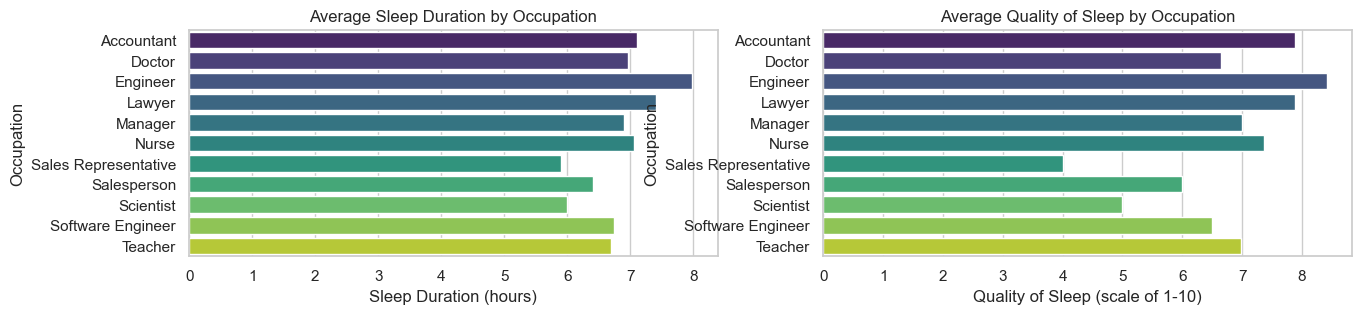

In [17]:
# Group data by Occupation and calculate mean Sleep Duration and Quality of Sleep
occupation_stats = df.groupby('Occupation').agg({'Sleep Duration': 'mean', 'Quality of Sleep': 'mean'}).reset_index()

# Set up the matplotlib figure and seaborn style
plt.figure(figsize=(15, 10))
sns.set(style="whitegrid")


# Plot Sleep Duration by Occupation
plt.subplot(3, 2, 1)
sns.barplot(x='Sleep Duration', y='Occupation', data=occupation_stats, palette='viridis')
plt.title('Average Sleep Duration by Occupation')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Occupation')

# Plot Quality of Sleep by Occupation
plt.subplot(3, 2, 2)
sns.barplot(x='Quality of Sleep', y='Occupation', data=occupation_stats, palette='viridis')
plt.title('Average Quality of Sleep by Occupation')
plt.xlabel('Quality of Sleep (scale of 1-10)')
plt.ylabel('Occupation')

**Problem-2 Presence of Sleep Desorders**

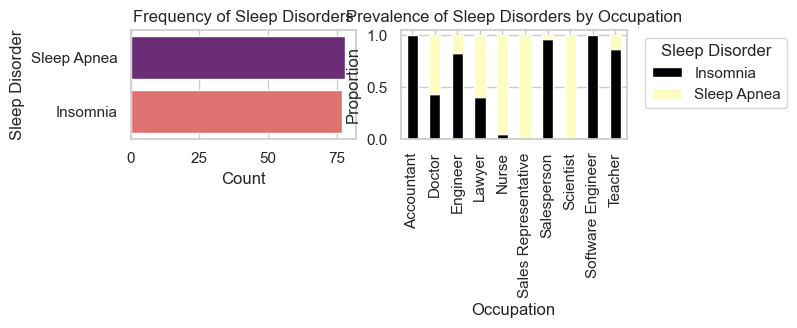

In [24]:
# Bar chart showing the frequency of different sleep disorders
plt.subplot(3, 2, 3)
sns.countplot(y='Sleep Disorder', data=df, palette='magma', order=df['Sleep Disorder'].value_counts().index)
plt.title('Frequency of Sleep Disorders')
plt.xlabel('Count')
plt.ylabel('Sleep Disorder')


# Stacked bar chart showing the prevalence of sleep disorders across different occupations
occupation_disorder_stats = df.groupby(['Occupation', 'Sleep Disorder']).size().unstack().fillna(0)
occupation_disorder_stats = occupation_disorder_stats.div(occupation_disorder_stats.sum(axis=1), axis=0)

plt.subplot(3, 2, 4)  
occupation_disorder_stats.plot(kind='bar', stacked=True, colormap='magma', ax=plt.gca())
plt.title('Prevalence of Sleep Disorders by Occupation')
plt.xlabel('Occupation')
plt.ylabel('Proportion')
plt.legend(title='Sleep Disorder', bbox_to_anchor=(1.05, 1), loc='upper left')


**Correlation Between Physical Activities,Stress Levels and Sleep Quality**

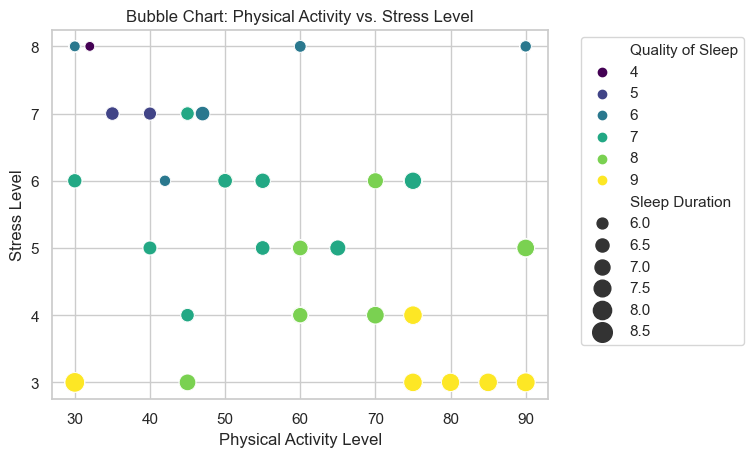

In [31]:
sns.scatterplot(x='Physical Activity Level', y='Stress Level', size='Sleep Duration', hue='Quality of Sleep', palette='viridis', data=df, sizes=(50, 200))
plt.xlabel('Physical Activity Level')
plt.ylabel('Stress Level')
plt.title('Bubble Chart: Physical Activity vs. Stress Level')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()